## Binary Tree
> **Question 2:** Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple bianry tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:  
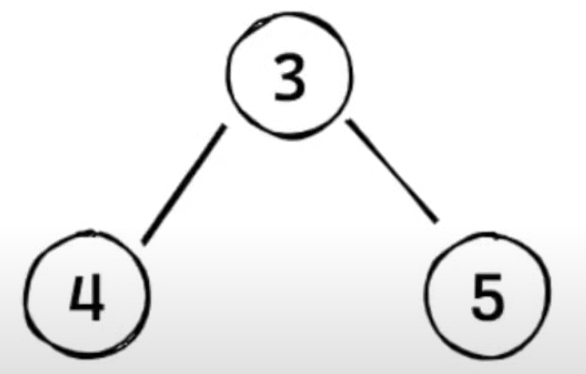  
Here's a simple class representing a node within a binary tree.

In [1]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

Let's create objects representing each node of the above tree.

In [2]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

Let's verify that the `node0` is an object of the type `TreeNode` and has the property `key` set to `3`.

In [4]:
node0

In [3]:
node0.key

3

We can *connect* the nodes by setting the `.left` and `.right` properties of the root node.

In [5]:
node0.left = node1
node0.right = node2

In [6]:
tree = node0

In [7]:
tree.key

3

In [8]:
tree.left.key

4

In [9]:
tree.right.key

5

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.  
  
**Exercise:** Create the following binary tree using `TreeNode` class defined above.

In [10]:
node3 = TreeNode(2)
node4 = TreeNode(3)
node5 = TreeNode(1)
node6 = TreeNode(5)
node7 = TreeNode(3)
node8 = TreeNode(4)
node9 = TreeNode(7)
node10 = TreeNode(6)
node11 = TreeNode(8)

In [11]:
# node3
node3.left = node4
node3.right = node6

In [12]:
# node4
node4.left = node5

In [13]:
# node6
node6.left = node7
node6.right = node9

In [14]:
# node7
node7.right = node8

In [15]:
# node9
node9.left = node10
node9.right = node11

In [17]:
node9.left.key

6

In [18]:
node9.right.key

8

In [20]:
node6.left.key, node6.right.key

(3, 7)

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `(left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themsleves tuples) into binary tree.  
  
Here's an tuple representing the tree shown above:

In [21]:
tree_tuple = ((1,3, None), 2, ((None, 3, 4), 5, (6,7,8)))

In [22]:
# class TreeNode:
#     def __init__(self, key):
#         self.key = key
#         self.left = None
#         self.right = None

def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [23]:
tree2 = parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [24]:
tree2

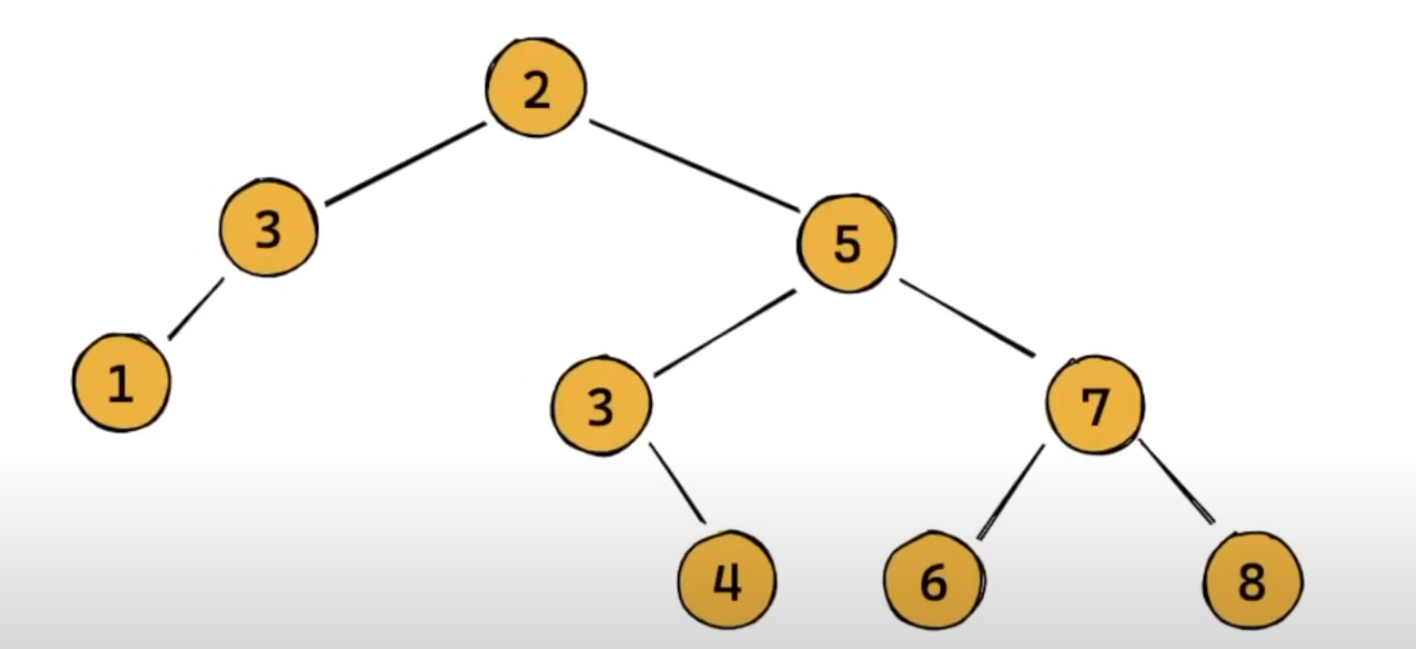

In [30]:
# level 0
tree2.key

2

In [31]:
# level 1
tree2.left.key, tree2.right.key

(3, 5)

In [32]:
# level 2
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key

(1, None, 3, 7)

In [33]:
# level 3
tree2.right.left.right.key, tree2.right.right.left.key, tree2.right.right.right.key

(4, 6, 8)

**Exercise:** Define a function `tree_to_tuple` that converts a binary tree into a tuple representing the same tree. E.g. `tree_to_tuple` converts the tree created above to tuple `((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))`.